In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Cargar el archivo CSV
df = pd.read_csv('Integracion_con_patógenos_y_enfermedades_Lactobacillus_Acidophilus_Padj_menor_0.05.csv')
# Mostrar las primeras filas y la informaci\u00f3n del DataFrame
df.head()


,Genes,DisGeNET_Term,DisGeNET_Pvalue_Adjusted,GeDiPNet_Term,GeDiPNet_Pvalue_Adjusted,Orphanet_Term,Orphanet_Pvalue_Adjusted,Virus_Host_Term,Virus_Host_Pvalue_Adjusted,Host organism(s)_Intact,Confidence value(s)_Intact,Taxid interactor A_Intact,Taxid interactor B_Intact
0,ALDH1A3,Non-Small Cell Lung Carcinoma; Malignant neopl...,0.0115553886934746; 0.012454946924149; 0.01645...,Isolated Microphthalmia-Anophthalmia-Coloboma;...,0.0173909707408734; 0.0173909707408734; 0.0173...,Intermediate generalized junctional epidermoly...,0.0215869769569472; 0.0215869769569472; 0.0215...,NaN,NaN,NaN,NaN,NaN,NaN
1,CXCL8,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,0.0050717829061455; 0.0050717829061455; 0.0050...,Pancreatic Neoplasm; Cholestasis; Stomach Neop...,0.0173909707408734; 0.0173909707408734; 0.0173...,Charcot-Marie-Tooth disease type 1D ORPHA:1010...,0.0029348234721257; 0.0029348234721257; 0.0215...,Cercopithecine betaherpesvirus 5 chemokine vCX...,0.017671985559931; 0.017671985559931; 0.017671...,Homo sapiens HLMVEC lung microvascular endothe...,0.61,Homo sapiens;chemical synthesis,Homo sapiens;chemical synthesis
2,EGR1,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,0.0050717829061455; 0.0050717829061455; 0.0050...,Cholestasis; Intrahepatic Cholestasis; Liver C...,0.0173909707408734; 0.0178898473883318; 0.0183...,Charcot-Marie-Tooth disease type 1D ORPHA:1010...,0.0029348234721257; 0.0029348234721257,Human papillomavirus 172 E7; Human papillomavi...,0.017671985559931; 0.017671985559931; 0.017671...,yeasx,0.37,Homo sapiens,Bacillus anthracis;Homo sapiens
3,SLC12A3,Epstein-Barr Virus Infections; Kaposi Sarcoma;...,0.0050717829061455; 0.0050717829061455; 0.0057...,Pancreatic Neoplasm; Hypermagnesemia; Nocturia...,0.0173909707408734; 0.0173909707408734; 0.0173...,UMOD-related autosomal dominant tubulointersti...,0.0215869769569472; 0.0215869769569472,NaN,NaN,In vitro,0.35,chemical synthesis,Homo sapiens


      Gene                           DisGeNET_Term_categories  \
0  ALDH1A3  Neurological Diseases, Associated with Dysbios...   
1    CXCL8  Viral Diseases, Associated with Dysbiosis, Can...   
2     EGR1  Viral Diseases, Associated with Dysbiosis, Can...   
3  SLC12A3  Neurological Diseases, Associated with Dysbios...   

                GeDiPNet_Term_categories  \
0                 Cancer, Other Diseases   
1  Rare Diseases, Cancer, Other Diseases   
2  Rare Diseases, Cancer, Other Diseases   
3                 Cancer, Other Diseases   

                Orphanet_Term_categories  
0  Rare Diseases, Cancer, Other Diseases  
1                 Cancer, Other Diseases  
2                         Other Diseases  
3                         Other Diseases  
Graph saved as 'disease_categories_barplot.png'


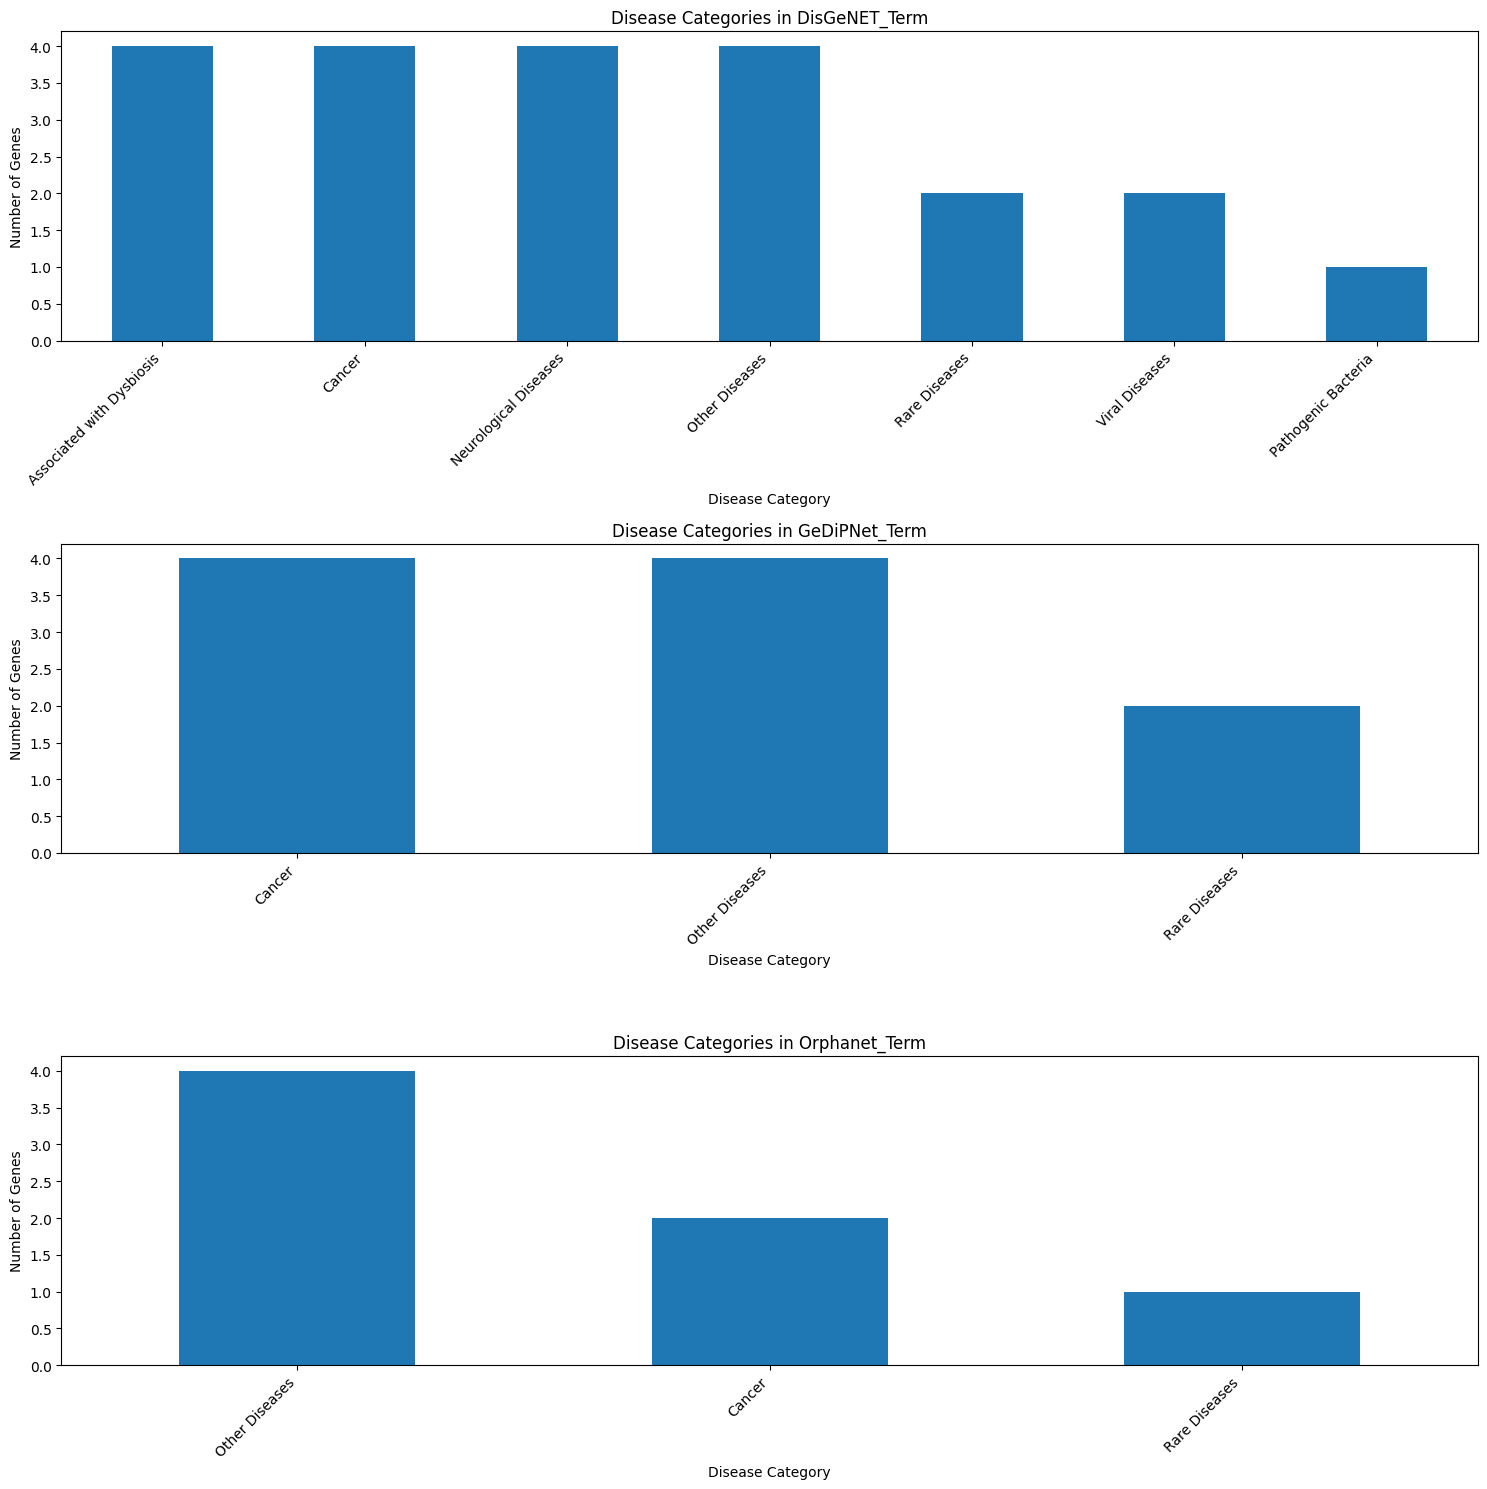

In [3]:


# Define disease categories
categories = {
    "Cancer": ["carcinoma", "cancer", "tumor", "neoplasm", "leukemia", "lymphoma", "sarcoma", "melanoma"],
    "Neurological Diseases": ["neurological", "amyotrophic", "parkinson", "alzheimer", "epilepsy", "schizophrenia", "bipolar disorder", "autism"],
    "Viral Diseases": ["viral", "HIV", "hepatitis", "influenza", "covid", "ebola", "dengue", "zika", "chikungunya"],
    "Pathogenic Bacteria": ["bacterial", "bacteria", "tuberculosis", "streptococcus", "staphylococcus", "pneumonia", "salmonella", "e. coli", "bacterial infection"],
    "Associated with Dysbiosis": ["dysbiosis", "gut microbiota", "intestinal microbiota", "inflammatory bowel disease", "irritable bowel syndrome", "non-alcoholic fatty liver disease", 
                                  "celiac disease", "necrotizing enterocolitis", "helicobacter pylori", "obesity", "diabetes", "anxiety", "stress", "digestive system"],
    "Rare Diseases": ["Ehlers-Danlos syndrome", "Charcot-Marie-Tooth disease", "epidermolysis bullosa", "citrullinemia", "amyloidosis", "glycogen storage disease", 
                       "rare disease", "orphan disease", "nephrotic syndrome", "glomerulonephritis", "autoimmune", "immunodeficiency"],
    "Other Diseases": []  # Unclassified diseases
}

def classify_disease(disease):
    # Check if the disease is NaN or "No information"
    if pd.isna(disease) or disease.lower() == "no information":
        return "No information"
    
    # Convert to lowercase for case-insensitive comparison
    disease = disease.lower()
    
    # Search for matches in the defined categories
    for category, keywords in categories.items():
        if any(keyword in disease for keyword in keywords):
            return category
            
    # If no match found, return "Other Diseases"
    return "Other Diseases"

def process_disease_column(column):
    if pd.isna(column):
        return ["No information"]
    diseases = column.split(';')
    return [disease.strip() for disease in diseases]

# Process disease columns
disease_columns = ['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term']

for col in disease_columns:
    df[f'{col}_processed'] = df[col].apply(process_disease_column)
    df[f'{col}_categories'] = df[f'{col}_processed'].apply(lambda x: [classify_disease(disease) for disease in x])

# Create a new DataFrame with the mapping
gene_disease_mapping = pd.DataFrame()
gene_disease_mapping['Gene'] = df['Genes']

for col in disease_columns:
    gene_disease_mapping[f'{col}_categories'] = df[f'{col}_categories'].apply(lambda x: ', '.join(set(x)))

# Show the first rows of the new DataFrame
print(gene_disease_mapping.head())

# Count the disease categories for each source, excluding "No information"
category_counts = {}
for col in disease_columns:
    # Exclude "No information"
    filtered_categories = gene_disease_mapping[f'{col}_categories'].apply(
        lambda x: ', '.join([cat for cat in x.split(', ') if cat != 'No information'])
    )
    # Count the categories
    category_counts[col] = filtered_categories.str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Create a bar plot for each disease source
fig, axes = plt.subplots(len(disease_columns), 1, figsize=(15, 5 * len(disease_columns)))

for i, (source, counts) in enumerate(category_counts.items()):
    ax = axes[i]
    if counts.empty:
        ax.text(0.5, 0.5, 'No data to plot', horizontalalignment='center', verticalalignment='center', fontsize=12)
        ax.set_title(f'Disease Categories in {source}')
        ax.set_xlabel('Disease Category')
        ax.set_ylabel('Number of Genes')
    else:
        counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Disease Categories in {source}')
        ax.set_xlabel('Disease Category')
        ax.set_ylabel('Number of Genes')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('disease_categories_barplot.png')
print("Graph saved as 'disease_categories_barplot.png'")


In [4]:
gene_disease_mapping

,Gene,DisGeNET_Term_categories,GeDiPNet_Term_categories,Orphanet_Term_categories
0,ALDH1A3,"Neurological Diseases, Associated with Dysbios...","Cancer, Other Diseases","Rare Diseases, Cancer, Other Diseases"
1,CXCL8,"Viral Diseases, Associated with Dysbiosis, Can...","Rare Diseases, Cancer, Other Diseases","Cancer, Other Diseases"
2,EGR1,"Viral Diseases, Associated with Dysbiosis, Can...","Rare Diseases, Cancer, Other Diseases",Other Diseases
3,SLC12A3,"Neurological Diseases, Associated with Dysbios...","Cancer, Other Diseases",Other Diseases


## Tablas resumen por categoría

Dado que ya tenemos las categorías de enfermedades clasificadas para cada gen, podríamos generar tablas de resumen que permitan obtener una visión general de cuántos genes están asociados a cada categoría de enfermedad

In [5]:
# Function to count the number of genes by category
def count_genes_by_category(df, disease_column_categories):
    category_counts = {}
    for categories in df[disease_column_categories]:
        for category in categories.split(', '):  # Split to handle multiple categories per gene
            category_counts[category] = category_counts.get(category, 0) + 1
    return category_counts

# Create a DataFrame with gene counts by category for each disease column
summary_tables = {}

for col in disease_columns:
    category_counts = count_genes_by_category(gene_disease_mapping, f'{col}_categories')
    summary_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Genes'])
    summary_tables[col] = summary_df

# Display summary tables for each column
for col, summary_df in summary_tables.items():
    print(f"Summary for {col}:")
    print(summary_df)
    print("\n")


Summary for DisGeNET_Term:
                    Category  Number of Genes
0      Neurological Diseases                4
1  Associated with Dysbiosis                4
2                     Cancer                4
3             Other Diseases                4
4             Viral Diseases                2
5        Pathogenic Bacteria                1
6              Rare Diseases                2


Summary for GeDiPNet_Term:
         Category  Number of Genes
0          Cancer                4
1  Other Diseases                4
2   Rare Diseases                2


Summary for Orphanet_Term:
         Category  Number of Genes
0   Rare Diseases                1
1          Cancer                2
2  Other Diseases                4




## Explorar genes asociados a múltiples categorías
Podríamos analizar qué genes están asociados a múltiples categorías de enfermedades, lo que podría indicar un rol relevante en diferentes contextos biológicos o patológicos.

In [6]:
# Function to find genes associated with multiple categories
def genes_in_multiple_categories(df, disease_column_categories):
    multiple_categories_genes = df[df[disease_column_categories].apply(lambda x: len(set(x.split(', '))) > 1)]
    return multiple_categories_genes

# Apply the function to each disease column
for col in disease_columns:
    multi_category_genes = genes_in_multiple_categories(gene_disease_mapping, f'{col}_categories')
    print(f"Genes associated with multiple categories in {col}:")
    print(multi_category_genes[['Gene', f'{col}_categories']])
    print("\n")


Genes associated with multiple categories in DisGeNET_Term:
      Gene                           DisGeNET_Term_categories
0  ALDH1A3  Neurological Diseases, Associated with Dysbios...
1    CXCL8  Viral Diseases, Associated with Dysbiosis, Can...
2     EGR1  Viral Diseases, Associated with Dysbiosis, Can...
3  SLC12A3  Neurological Diseases, Associated with Dysbios...


Genes associated with multiple categories in GeDiPNet_Term:
      Gene               GeDiPNet_Term_categories
0  ALDH1A3                 Cancer, Other Diseases
1    CXCL8  Rare Diseases, Cancer, Other Diseases
2     EGR1  Rare Diseases, Cancer, Other Diseases
3  SLC12A3                 Cancer, Other Diseases


Genes associated with multiple categories in Orphanet_Term:
      Gene               Orphanet_Term_categories
0  ALDH1A3  Rare Diseases, Cancer, Other Diseases
1    CXCL8                 Cancer, Other Diseases




In [7]:
# Exportar el mapeo completo de genes a CSV
gene_disease_mapping.to_csv('gene_disease_mapping.csv', index=False)

# Exportar las tablas resumen a archivos CSV
for col, summary_df in summary_tables.items():
    summary_df.to_csv(f'summary_{col}.csv', index=False)

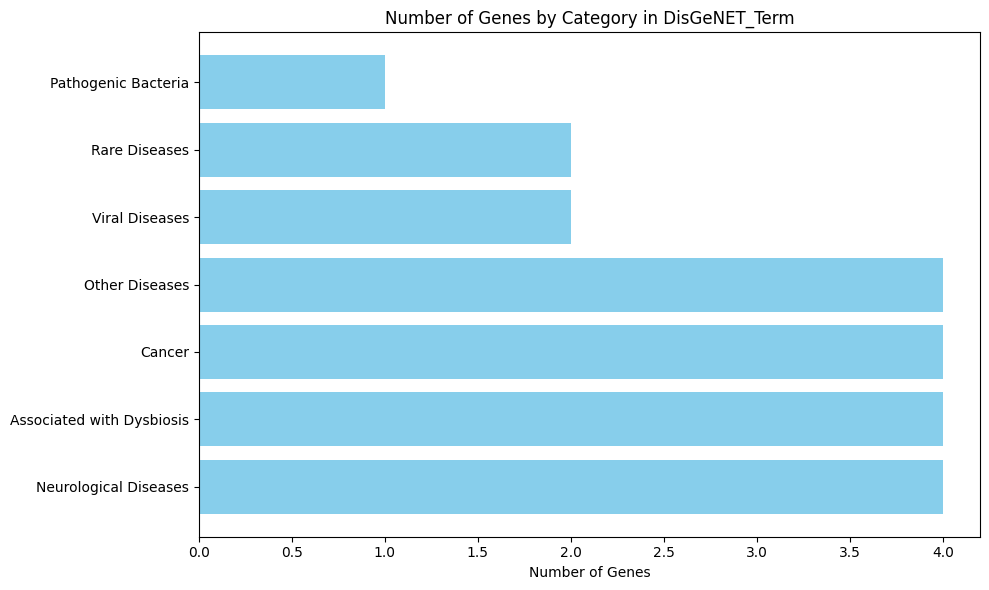

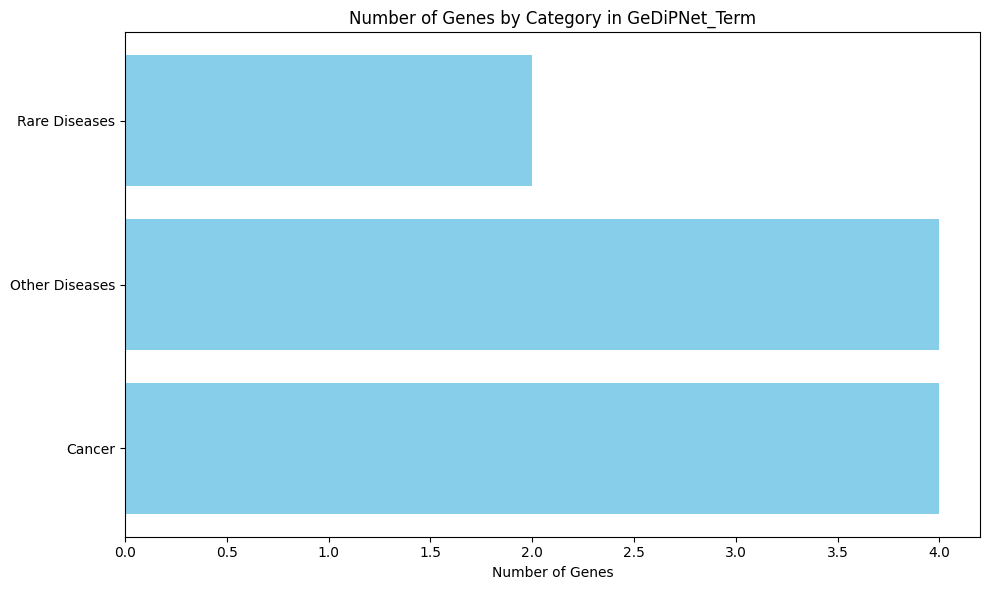

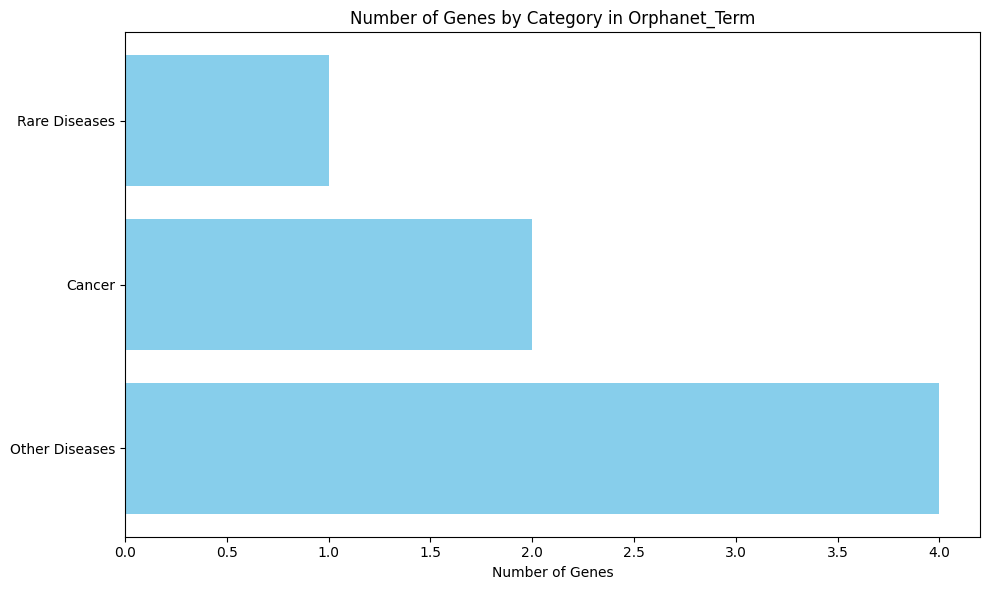

In [8]:

# Function to generate a bar chart by category
def plot_category_distribution(summary_df, title):
    summary_df.sort_values(by='Number of Genes', ascending=False, inplace=True)
    plt.figure(figsize=(10, 6))
    plt.barh(summary_df['Category'], summary_df['Number of Genes'], color='skyblue')
    plt.xlabel('Number of Genes')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Generate bar charts for each disease column
for col, summary_df in summary_tables.items():
    plot_category_distribution(summary_df, f'Number of Genes by Category in {col}')


## Procedimiento para obtener tablas de genes por categoría:
A continuación podemos organizar los genes asociados a cada una de las categorías de enfermedades:

Agrupar los genes por cada categoría: De acuerdo a las categorías que ya definidas en categories, puedemos filtrar los genes que están asociados con las enfermedades correspondientes.

Crear tablas para cada categoría: Para cada categoría de enfermedad, crear un subconjunto del DataFrame que contenga solo los genes relacionados con dicha categoría.

In [9]:
# Inicializar un diccionario para almacenar genes por categoría
genes_by_category = {category: [] for category in categories.keys()}

# Función para agregar genes a las categorías correspondientes
def classify_genes_by_category(row):
    for col in disease_columns:
        for category in row[f'{col}_categories'].split(', '):
            if category in genes_by_category:
                genes_by_category[category].append(row['Gene'])

# Aplicar la función a cada fila del DataFrame
gene_disease_mapping.apply(classify_genes_by_category, axis=1)

# Eliminar duplicados de cada lista de genes por categoría
genes_by_category = {category: list(set(genes)) for category, genes in genes_by_category.items()}

# Mostrar genes agrupados por categoría
for category, genes in genes_by_category.items():
    print(f"Categoría: {category}")
    print(f"Genes: {', '.join(genes)}\n")


Categoría: Cancer
Genes: SLC12A3, CXCL8, EGR1, ALDH1A3

Categoría: Neurological Diseases
Genes: SLC12A3, CXCL8, EGR1, ALDH1A3

Categoría: Viral Diseases
Genes: CXCL8, EGR1

Categoría: Pathogenic Bacteria
Genes: CXCL8

Categoría: Associated with Dysbiosis
Genes: SLC12A3, CXCL8, EGR1, ALDH1A3

Categoría: Rare Diseases
Genes: CXCL8, EGR1, ALDH1A3

Categoría: Other Diseases
Genes: SLC12A3, CXCL8, EGR1, ALDH1A3



In [10]:
# Crear un DataFrame para cada categoría
tables_by_category = {}

for category, genes in genes_by_category.items():
    tables_by_category[category] = pd.DataFrame(genes, columns=['Gene'])

# Mostrar la tabla para una categoría específica (ejemplo: "Cáncer")
print(tables_by_category['Cancer'])


      Gene
0  SLC12A3
1    CXCL8
2     EGR1
3  ALDH1A3


In [11]:
# Exportar tablas a CSV
for category, table in tables_by_category.items():
    table.to_csv(f'genes_{category}.csv', index=False)


DataFrame que contenga todas las categorías de enfermedades, agrupando los genes en una sola estructura:

In [12]:
# Create a list to store gene data and their categories
gene_category_data = []

# Function to add each gene and the categories it belongs to
def append_gene_category_data(row):
    for col in disease_columns:
        for category in row[f'{col}_categories'].split(', '):
            gene_category_data.append([row['Gene'], category])

# Apply the function to add data for each row
gene_disease_mapping.apply(append_gene_category_data, axis=1)

# Create the DataFrame with gene and category data
df_genes_categories = pd.DataFrame(gene_category_data, columns=['Gene', 'Category'])

# Display the first rows of the DataFrame
print(df_genes_categories.head())


      Gene                   Category
0  ALDH1A3      Neurological Diseases
1  ALDH1A3  Associated with Dysbiosis
2  ALDH1A3                     Cancer
3  ALDH1A3             Other Diseases
4  ALDH1A3                     Cancer


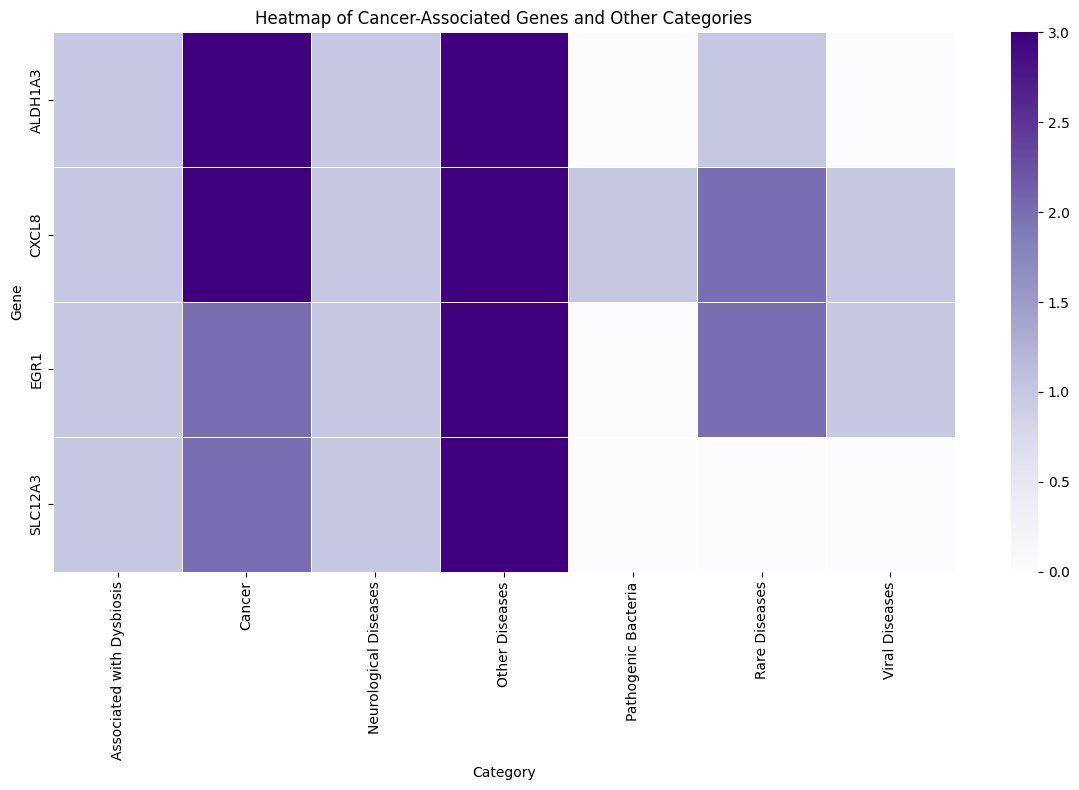

In [13]:


# Paso 1: Filtrar genes asociados a la categoría "Cáncer"
df_cancer_genes = df_genes_categories[df_genes_categories['Category'] == 'Cancer']

# Paso 2: Obtener todos los genes asociados a "Cáncer"
cancer_genes = df_cancer_genes['Gene'].unique()

# Filtrar el DataFrame original para obtener las categorías de estos genes
df_cancer_related_categories = df_genes_categories[df_genes_categories['Gene'].isin(cancer_genes)]

# Paso 3: Crear una tabla pivote (gene-category matrix) donde se muestren las asociaciones
# Esto genera una matriz donde las filas son los genes y las columnas son las categorías
df_pivot = df_cancer_related_categories.pivot_table(index='Gene', columns='Category', aggfunc='size', fill_value=0)

# Paso 4: Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Purples', linewidths=0.5)
plt.title('Heatmap of Cancer-Associated Genes and Other Categories')
plt.tight_layout()

# Mostrar el heatmap
plt.show()

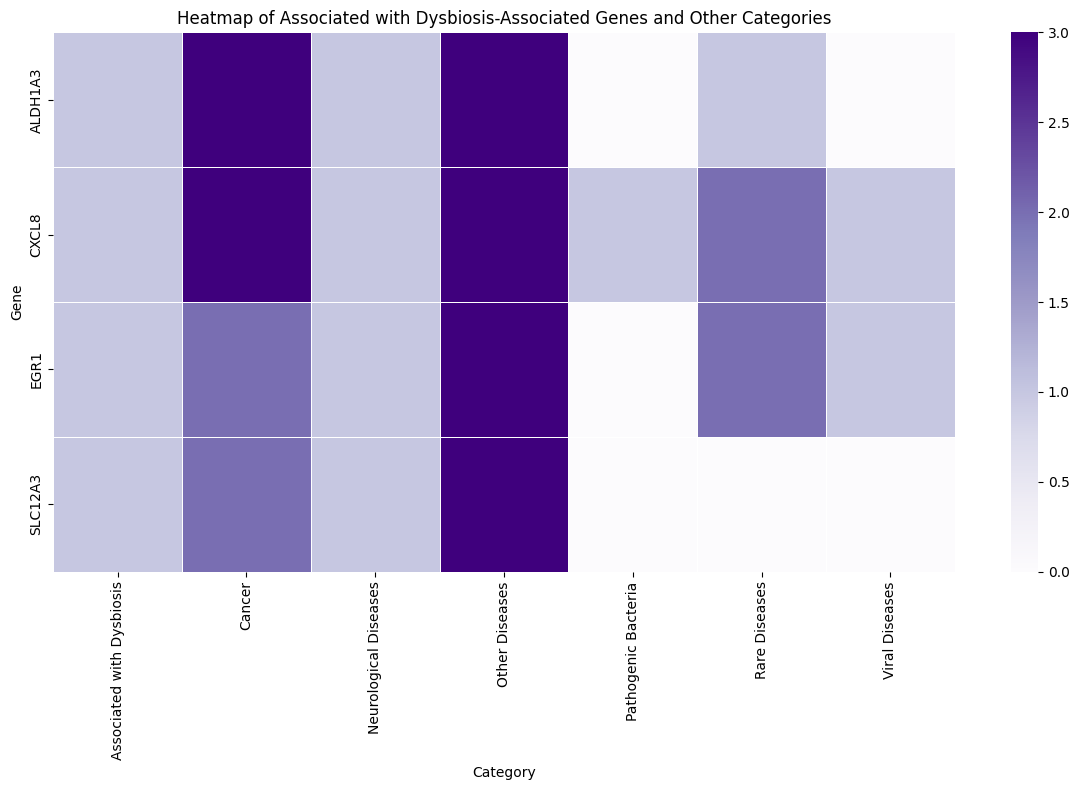

In [14]:
# Paso 1: Filtrar genes asociados a la categoría "Cáncer"
df_cancer_genes = df_genes_categories[df_genes_categories['Category'] == 'Associated with Dysbiosis']

# Paso 2: Obtener todos los genes asociados a "Cáncer"
cancer_genes = df_cancer_genes['Gene'].unique()

# Filtrar el DataFrame original para obtener las categorías de estos genes
df_cancer_related_categories = df_genes_categories[df_genes_categories['Gene'].isin(cancer_genes)]

# Paso 3: Crear una tabla pivote (gene-category matrix) donde se muestren las asociaciones
# Esto genera una matriz donde las filas son los genes y las columnas son las categorías
df_pivot = df_cancer_related_categories.pivot_table(index='Gene', columns='Category', aggfunc='size', fill_value=0)

# Paso 4: Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Purples', linewidths=0.5)
plt.title('Heatmap of Associated with Dysbiosis-Associated Genes and Other Categories')
plt.tight_layout()

# Mostrar el heatmap
plt.show()

In [14]:
# Group categories by each gene and combine them into a single comma-separated list
df_genes_grouped = df_genes_categories.groupby('Gene')['Category'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Filter the DataFrame to remove rows with categories "No information" or "Other Diseases"
df_filtered = df_genes_categories[~df_genes_categories['Category'].isin(["No information", "Other Diseases"])]

# Group categories by each gene and combine them into a single comma-separated list
df_genes_grouped = df_filtered.groupby('Gene')['Category'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Display the first rows of the grouped DataFrame
print(df_genes_grouped.head())


      Gene                                           Category
0  ALDH1A3  Associated with Dysbiosis, Cancer, Neurologica...
1    CXCL8  Associated with Dysbiosis, Cancer, Neurologica...
2     EGR1  Associated with Dysbiosis, Cancer, Neurologica...
3  SLC12A3  Associated with Dysbiosis, Cancer, Neurologica...


In [15]:
# Filter genes associated with multiple categories (more than one category)
df_genes_multiple_categories = df_genes_grouped[df_genes_grouped['Category'].apply(lambda x: len(x.split(', ')) > 1)]

# Display genes associated with multiple categories
print("Genes associated with multiple categories:")
print(df_genes_multiple_categories)

# Optional: Display only the genes
common_genes = df_genes_multiple_categories['Gene'].unique()

print("Common genes involved in multiple categories:")
print(common_genes)

# Export to Excel
df_genes_multiple_categories.to_excel('genes_multiple_categories.xlsx', index=False)

# Export to CSV
df_genes_multiple_categories.to_csv('genes_multiple_categories.csv', index=False)

print("Data exported to 'genes_multiple_categories.xlsx' and 'genes_multiple_categories.csv'")

# Export to Excel
df_genes_multiple_categories.to_excel("common_genes.xlsx", index=False)

# Export to CSV
df_genes_multiple_categories.to_csv("common_genes.csv", index=False)

print("Common genes have been exported to 'common_genes.xlsx' and 'common_genes.csv'")


Genes associated with multiple categories:
      Gene                                           Category
0  ALDH1A3  Associated with Dysbiosis, Cancer, Neurologica...
1    CXCL8  Associated with Dysbiosis, Cancer, Neurologica...
2     EGR1  Associated with Dysbiosis, Cancer, Neurologica...
3  SLC12A3  Associated with Dysbiosis, Cancer, Neurologica...
Common genes involved in multiple categories:
['ALDH1A3' 'CXCL8' 'EGR1' 'SLC12A3']
Data exported to 'genes_multiple_categories.xlsx' and 'genes_multiple_categories.csv'
Common genes have been exported to 'common_genes.xlsx' and 'common_genes.csv'


In [16]:
import openpyxl
df_genes_grouped.to_csv('genes_grouped_by_category.csv', index=False)
df_genes_grouped.to_excel('genes_grouped_by_category.xlsx', index=False)


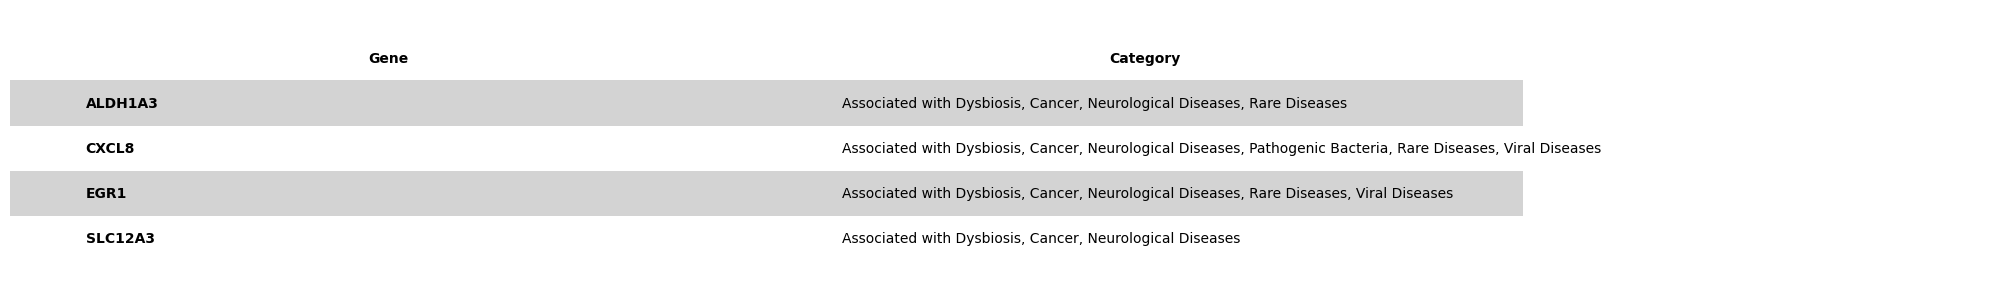

In [46]:

# df_genes_grouped = pd.read_csv('genes_grouped_by_category_filtered.csv')

# Ajustar el tamaño de la figura para evitar tamaño excesivo
fig, ax = plt.subplots(figsize=(22, 3))  # Ajusta el tamaño según sea necesario

# Eliminar los ejes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Crear una lista de colores para el sombreado alternado (sin la fila de encabezados)
num_rows = len(df_genes_grouped)
num_cols = len(df_genes_grouped.columns)
colors = [['white' if i % 2 else 'lightgray' for j in range(num_cols)] for i in range(num_rows)]

# Añadir la tabla a la figura
table = plt.table(cellText=df_genes_grouped.values, 
                  colLabels=df_genes_grouped.columns, 
                  cellLoc='left', 
                  loc='left',
                  cellColours= colors)  # Añadir la fila de encabezados en blanco

# Estilo de las celdas
for (i, j), val in np.ndenumerate(df_genes_grouped.values):
    if i == 0:  # La primera fila (títulos) en negrilla
        table[(i, j)].set_text_props(weight='bold')
    if j == 0:  # La primera columna (Gene) en negrilla
        table[(i + 1, j)].set_text_props(weight='bold')
    table[(i + 1, j)].set_fontsize(12)  # Ajustar el tamaño de la fuente de los datos

# Ajustar el estilo de las líneas
for key, cell in table._cells.items():
    cell.set_edgecolor('none')  # Eliminar el borde de todas las celdas

# Ajustar el tamaño de la tabla para evitar imagen demasiado grande
plt.tight_layout(pad=0.8)

# Ajustar el tamaño de las celdas y la fuente
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(3.2, 2.25)  # Ajustar escala si es necesario

# Guardar la tabla como imagen
plt.savefig('genes_grouped_table.png', bbox_inches='tight', dpi=300)

# Mostrar la imagen
plt.show()


Heatmap guardado como 'protein_interaction_heatmap.png'


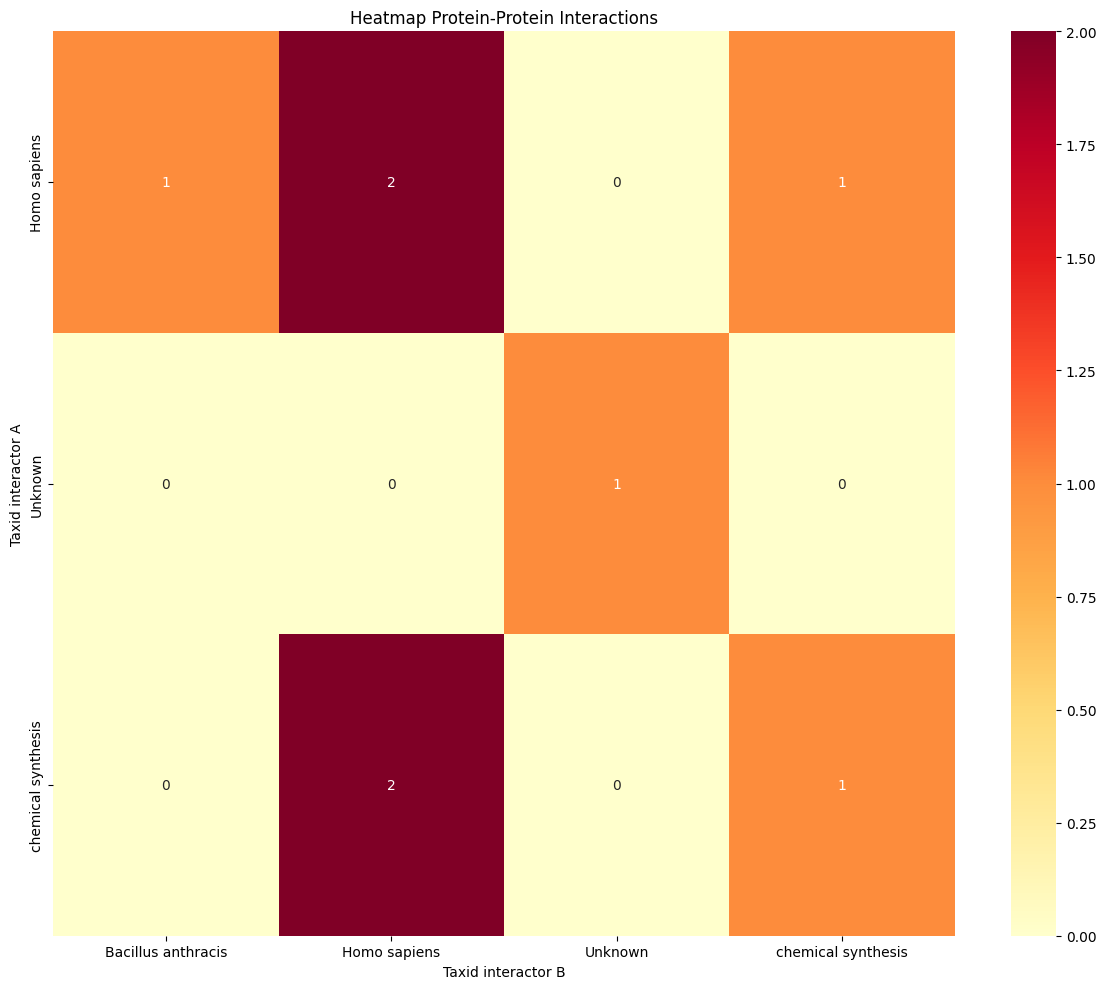

In [47]:
# Función para procesar los campos de taxa que pueden tener múltiples valores separados por ';'
def process_taxid_column(column):
    taxa = column.split(';')
    return [taxon.strip() for taxon in taxa]

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact']].copy()

# Rellenar valores nulos con 'Unknown' y separar los taxones
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_taxid_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_taxid_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxa en interactor A e interactor B
interaction_df = interaction_df.explode('Taxid interactor A_Intact').explode('Taxid interactor B_Intact')

# Crear la matriz de interacciones
interaction_matrix = pd.crosstab(interaction_df['Taxid interactor A_Intact'], interaction_df['Taxid interactor B_Intact'])

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap Protein-Protein Interactions')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_heatmap.png')
print("Heatmap guardado como 'protein_interaction_heatmap.png'")



Contenido de confidence_matrix:
Taxid interactor B_Intact Unknown
Taxid interactor A_Intact        
Unknown                       0.0


C:\Users\3060\AppData\Local\Temp\ipykernel_12112\1775578015.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  confidence_matrix = confidence_matrix.fillna(0)


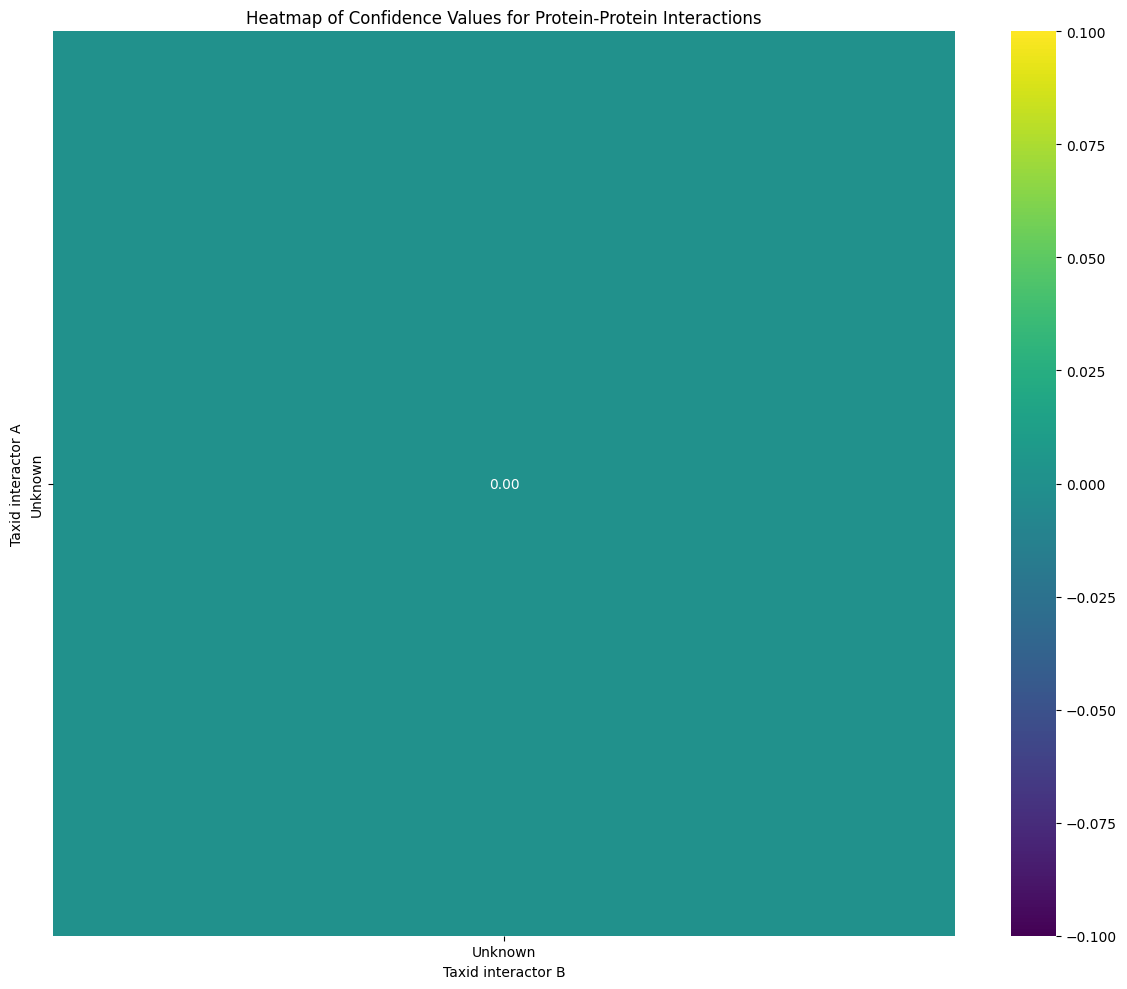

In [48]:


# Función para procesar columnas que contienen listas separadas por ";"
def process_column(column):
    if isinstance(column, str):
        return [item.strip() for item in column.split(';')]
    return []

# Función para procesar las columnas de confianza
def process_confidence_column(column):
    if isinstance(column, str):
        return [float(conf) for conf in process_column(column)]
    return []

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact', 'Host organism(s)_Intact']].copy()

# Procesar las columnas de interacciones para manejar múltiples valores
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Confidence value(s)_Intact'] = interaction_df['Confidence value(s)_Intact'].fillna('0').apply(process_confidence_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxones y valores de confianza
interaction_df = interaction_df.explode('Taxid interactor A_Intact')
interaction_df = interaction_df.explode('Taxid interactor B_Intact')
interaction_df = interaction_df.explode('Confidence value(s)_Intact')

# Asegurarse de que las columnas no contengan listas
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].astype(str)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].astype(str)

# Crear la matriz de confianza entre Taxid interactor A y Taxid interactor B
confidence_matrix = pd.pivot_table(interaction_df, values='Confidence value(s)_Intact', index='Taxid interactor A_Intact', columns='Taxid interactor B_Intact', aggfunc='mean')

# Verificar el contenido de la matriz de confianza
print("Contenido de confidence_matrix:")
print(confidence_matrix)

# Manejar valores NaN en la matriz de confianza
confidence_matrix = confidence_matrix.fillna(0)

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(confidence_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Confidence Values for Protein-Protein Interactions')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_confidence_heatmap.png')
plt.show()  # Mostrar el gráfico en lugar de solo guardarlo





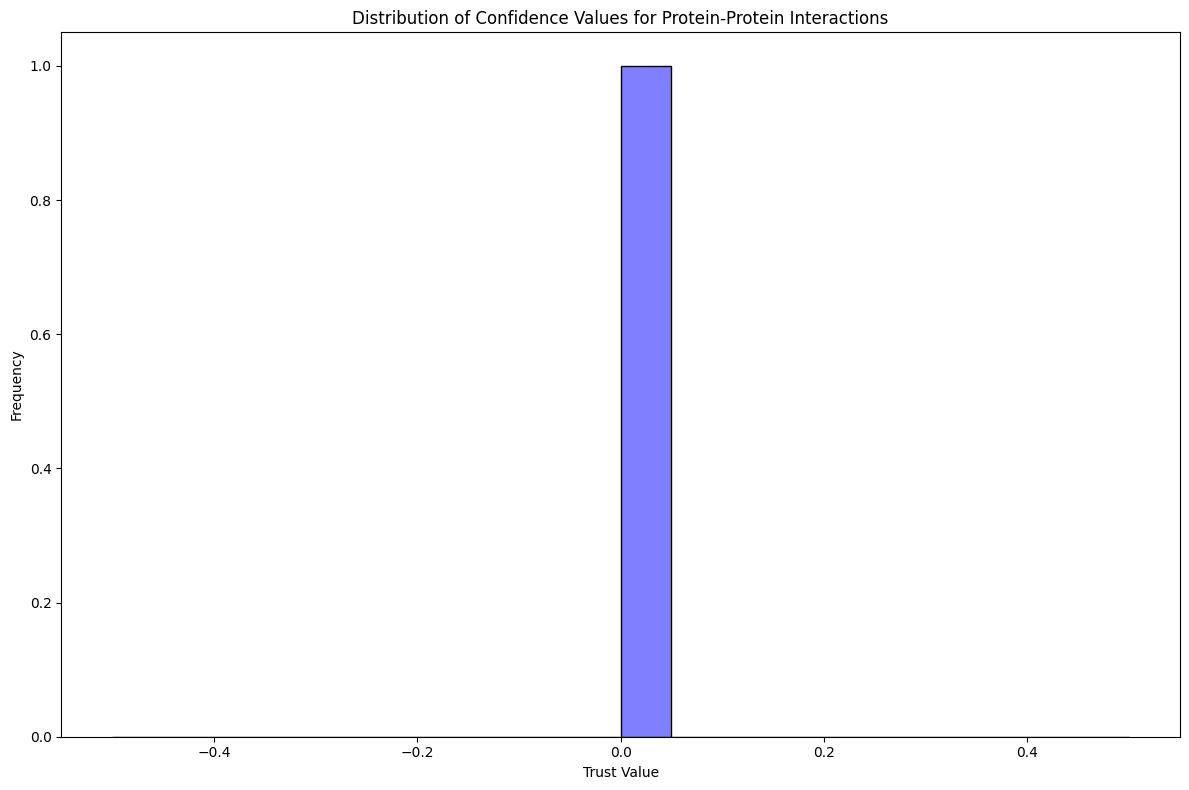

In [49]:
# Asumiendo que 'interaction_df' ya está procesado
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para la distribución de valores de confianza
sns.histplot(interaction_df['Confidence value(s)_Intact'], bins=20, kde=True, color='b')
plt.title('Distribution of Confidence Values for Protein-Protein Interactions')
plt.xlabel('Trust Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('confidence_distribution_bar_plot.png')
plt.show()

Taxid interactor A_Intact      object
Taxid interactor B_Intact      object
Confidence value(s)_Intact    float64
dtype: object
(1, 3)


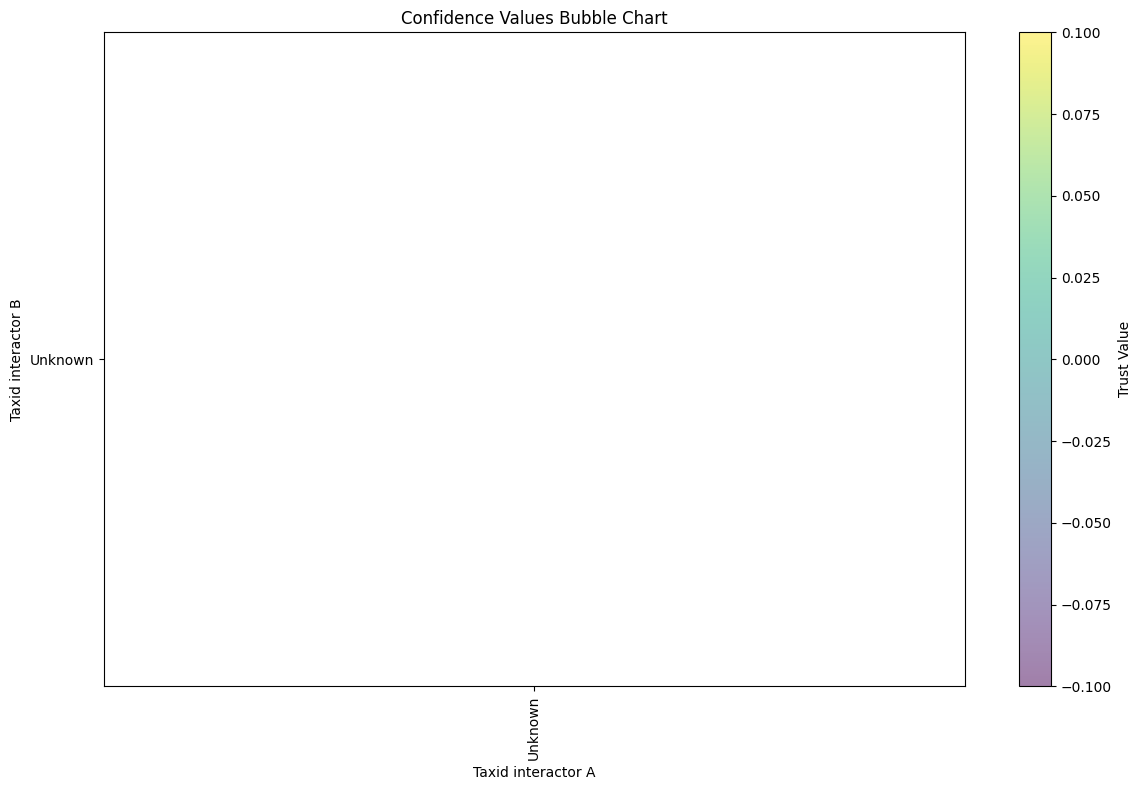

In [50]:
# Convertir la columna 'Confidence value(s)_Intact' a tipo numérico
interaction_df['Confidence value(s)_Intact'] = pd.to_numeric(interaction_df['Confidence value(s)_Intact'], errors='coerce')

# Eliminar filas con valores nulos en 'Confidence value(s)_Intact'
interaction_df = interaction_df.dropna(subset=['Confidence value(s)_Intact'])

# Verificar los tamaños y tipos después de la conversión
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].dtypes)
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].shape)

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))

plt.scatter(
    interaction_df['Taxid interactor A_Intact'],
    interaction_df['Taxid interactor B_Intact'],
    s=interaction_df['Confidence value(s)_Intact'] * 100,  # Tamaño de la burbuja
    alpha=0.5,
    c=interaction_df['Confidence value(s)_Intact'],  # Color según el valor de confianza
    cmap='viridis',  # Mapa de colores
    edgecolors='w'
)

plt.title('Confidence Values Bubble Chart')
plt.xlabel('Taxid interactor A')
plt.ylabel('Taxid interactor B')
plt.colorbar(label='Trust Value')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('confidence_bubble_chart.png')
plt.show()

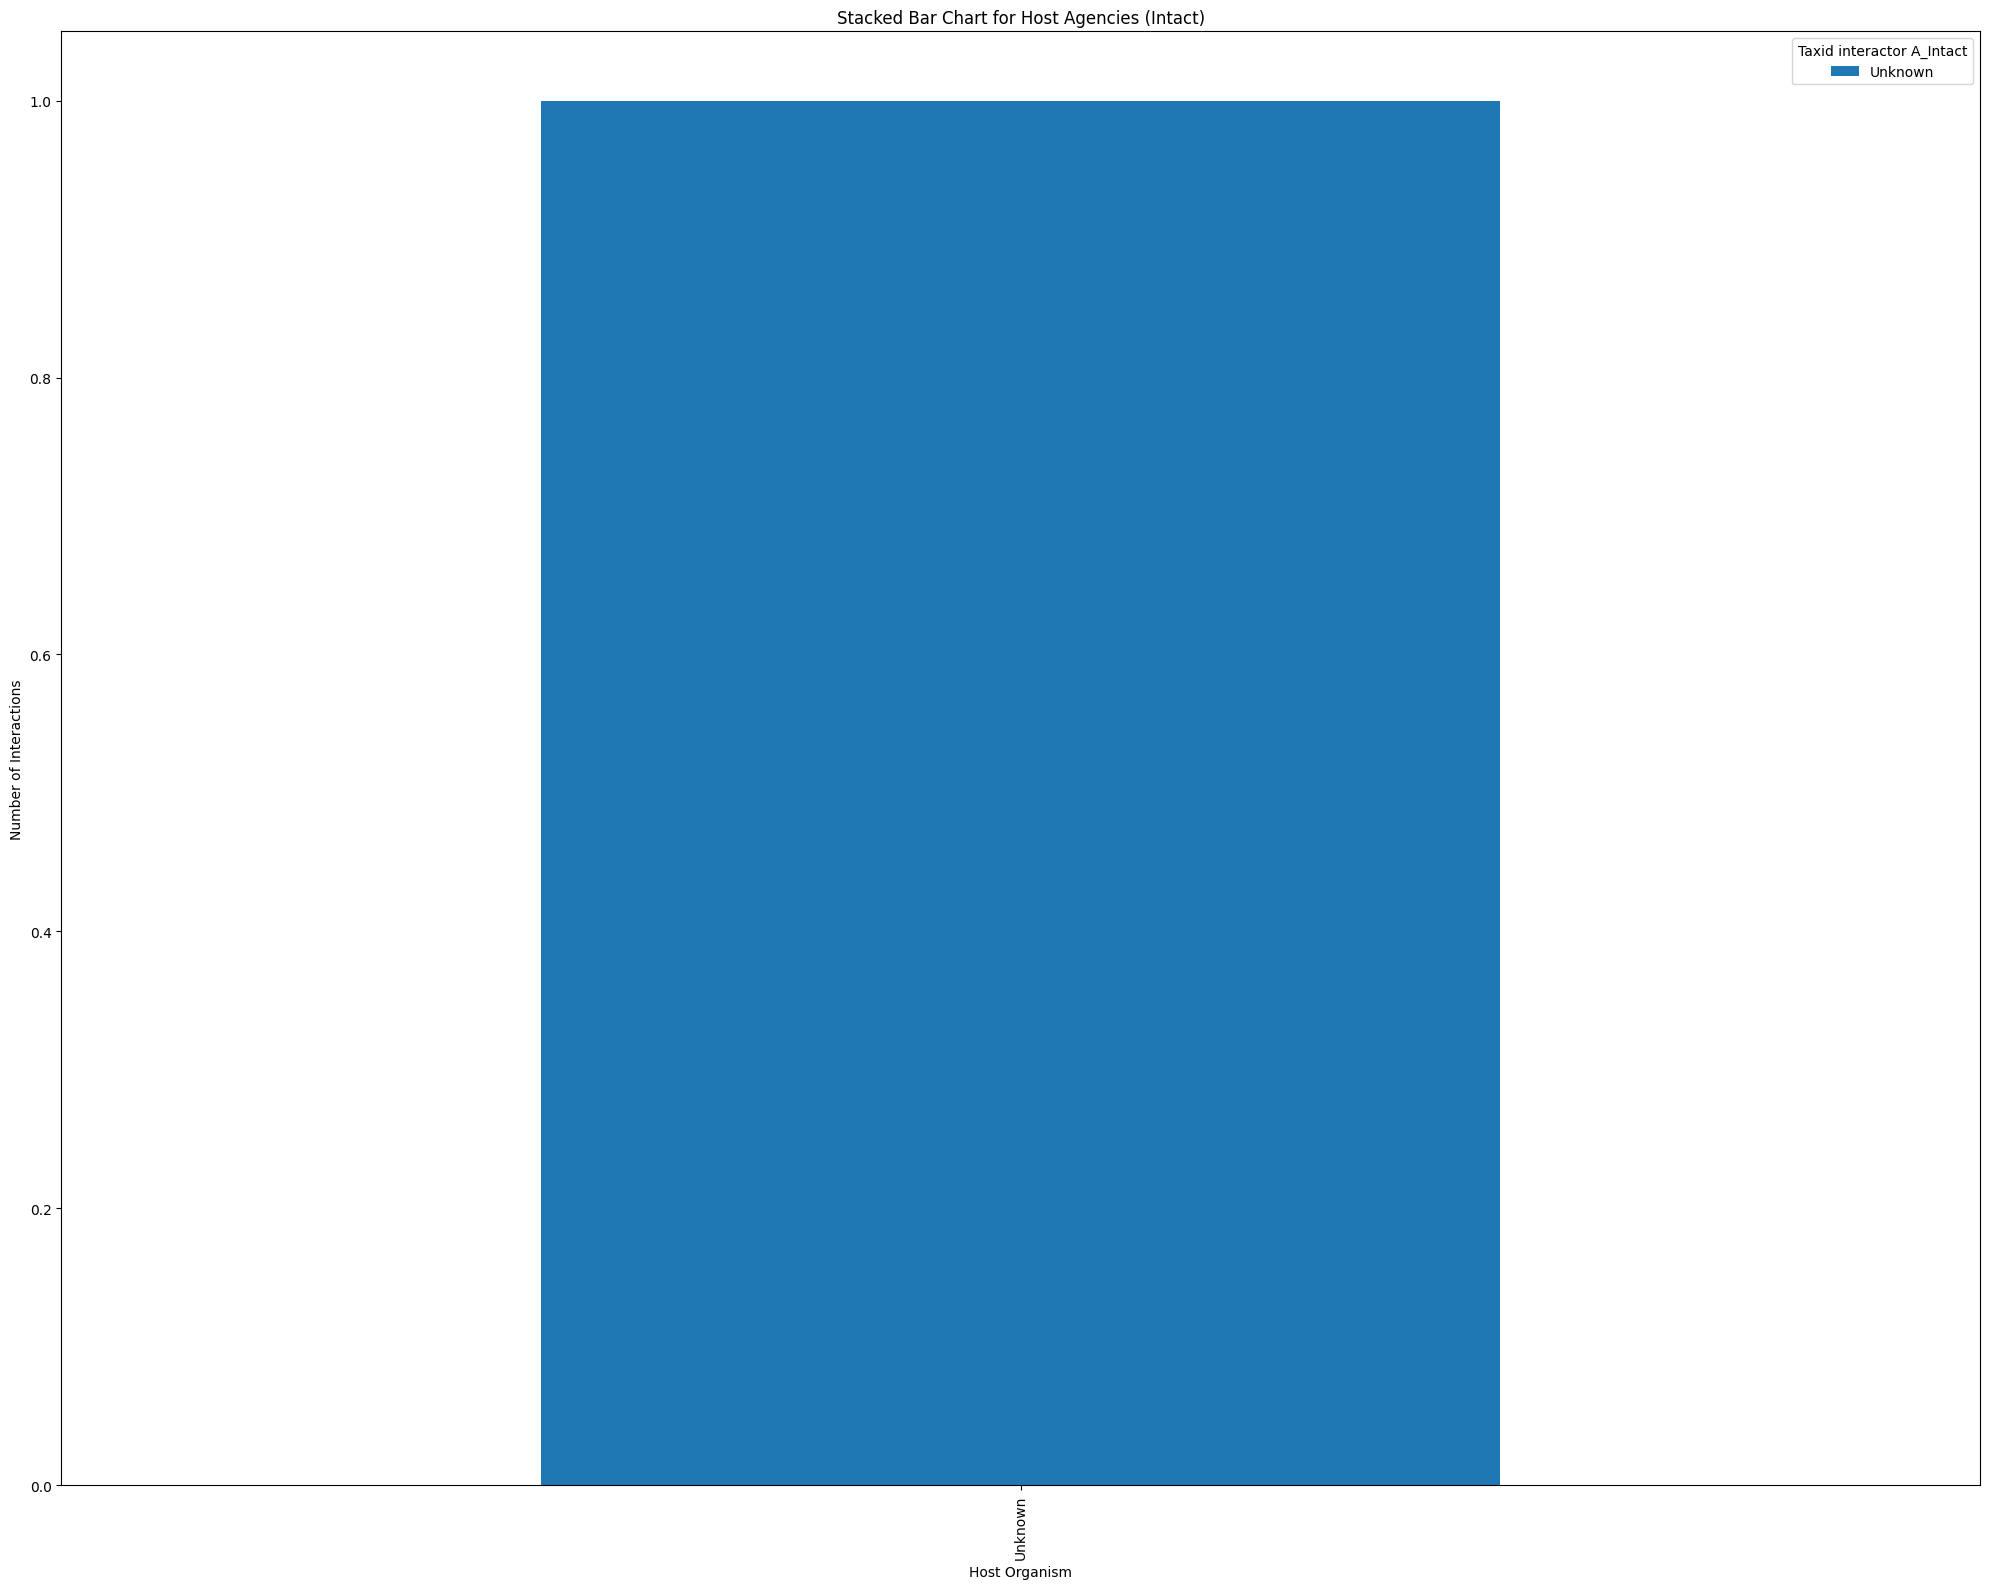

In [51]:
# Supongamos que tienes una columna 'Host organism(s)_Intact' en 'interaction_df'
interaction_df['Host organism(s)_Intact'] = interaction_df['Host organism(s)_Intact'].fillna('Unknown').apply(process_column)

# Expandir los organismos anfitriones
interaction_df = interaction_df.explode('Host organism(s)_Intact')

# Crear una tabla de datos para el gráfico apilado
host_data = interaction_df.groupby(['Host organism(s)_Intact', 'Taxid interactor A_Intact']).size().unstack(fill_value=0)

# Generar el gráfico de barras apiladas
host_data.plot(kind='bar', stacked=True, figsize=(20, 16))
plt.title('Stacked Bar Chart for Host Agencies (Intact)')
plt.xlabel('Host Organism')
plt.ylabel('Number of Interactions')
plt.tight_layout()
plt.savefig('stacked_bar_plot_host_organisms.png')
plt.show()

<Figure size 2400x2200 with 0 Axes>

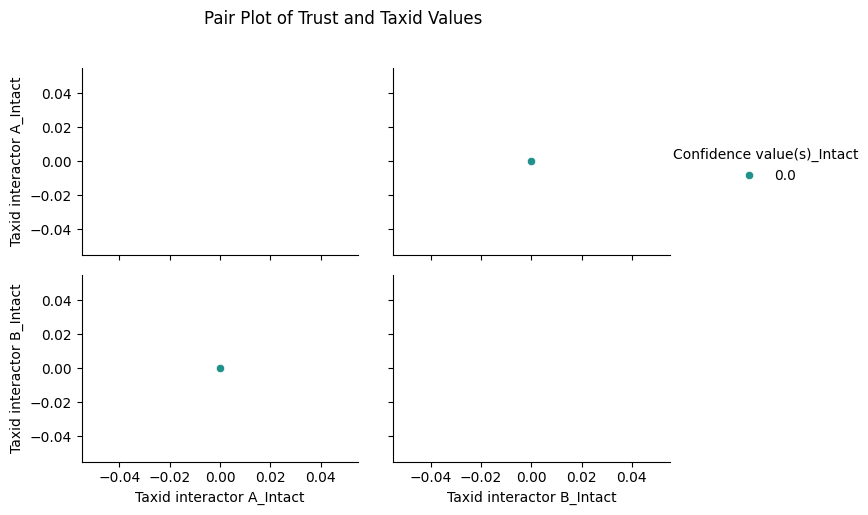

In [52]:
# Crear un DataFrame con valores numéricos para Pair Plot
pair_plot_df = interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].copy()

# Convertir los taxones a categorías para el pairplot
pair_plot_df['Taxid interactor A_Intact'] = pair_plot_df['Taxid interactor A_Intact'].astype('category').cat.codes
pair_plot_df['Taxid interactor B_Intact'] = pair_plot_df['Taxid interactor B_Intact'].astype('category').cat.codes

# Ajustar el tamaño de la figura
plt.figure(figsize=(24, 22))  # Ajusta el tamaño según tus necesidades

# Generar el Pair Plot
pair_plot = sns.pairplot(pair_plot_df, hue='Confidence value(s)_Intact', palette='viridis')

# Añadir título
pair_plot.fig.suptitle('Pair Plot of Trust and Taxid Values', y=1.02)

# Ajustar la posición de la leyenda
pair_plot._legend.set_bbox_to_anchor((1.25, 0.7))  # Ajusta la posición (x, y) según sea necesario

# Ajustar el layout
plt.tight_layout()
plt.savefig('pair_plot_confidence_taxid.png')
plt.show()

Heatmap guardado como 'gene_virus_host_heatmap.png'


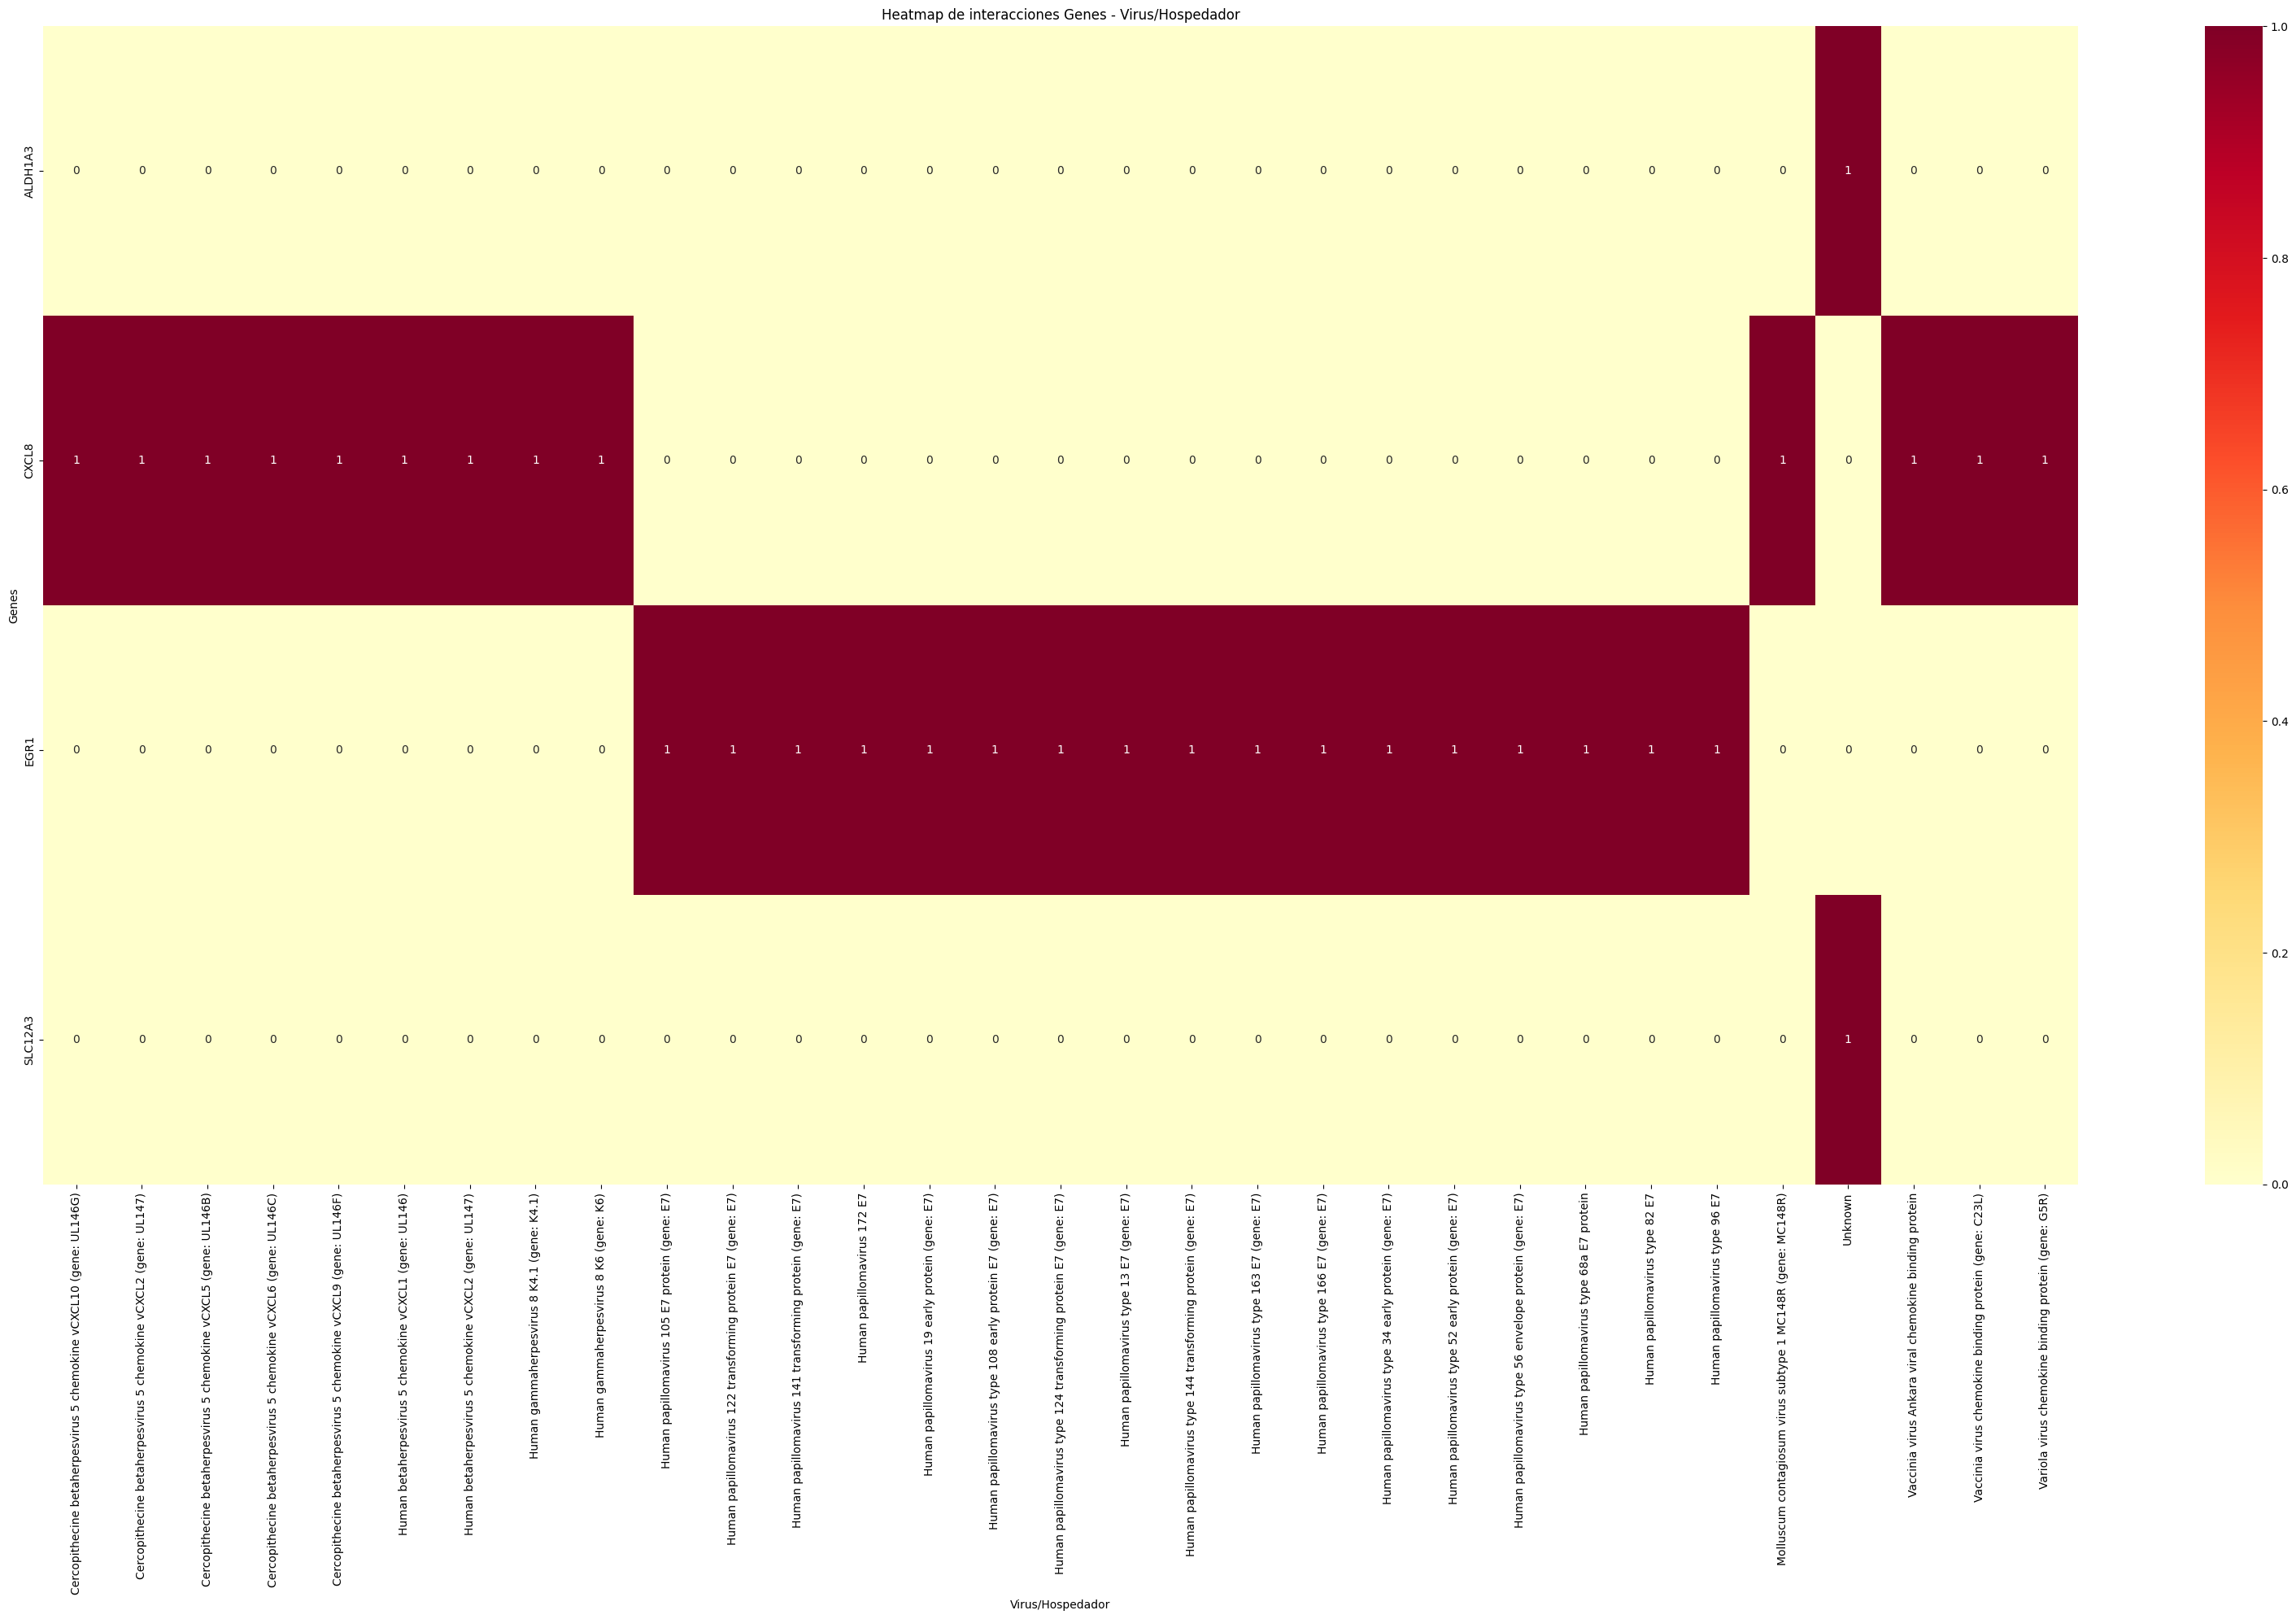

In [53]:
# Procesar las columnas de genes y términos de virus/hospedador para manejar múltiples valores
def process_column(column):
    terms = column.split(';')
    return [term.strip() for term in terms]

# Crear una copia del DataFrame y procesar las columnas relevantes
interaction_df = df[['Genes', 'Virus_Host_Term']].copy()

# Rellenar valores nulos con 'Unknown' y separar los términos
interaction_df['Genes'] = interaction_df['Genes'].fillna('Unknown')
interaction_df['Virus_Host_Term'] = interaction_df['Virus_Host_Term'].fillna('Unknown').apply(process_column)

# Expandir el DataFrame para tener una fila por cada combinación de genes y términos de virus/hospedador
interaction_df = interaction_df.explode('Genes').explode('Virus_Host_Term')

# Crear la matriz de interacciones entre Genes y Virus_Host_Term
interaction_matrix = pd.crosstab(interaction_df['Genes'], interaction_df['Virus_Host_Term'])

# Generar el heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap de interacciones Genes - Virus/Hospedador')
plt.xlabel('Virus/Hospedador')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('gene_virus_host_heatmap.png')
print("Heatmap guardado como 'gene_virus_host_heatmap.png'")


Heatmap guardado como 'top50_gene_virus_host_heatmap.png'


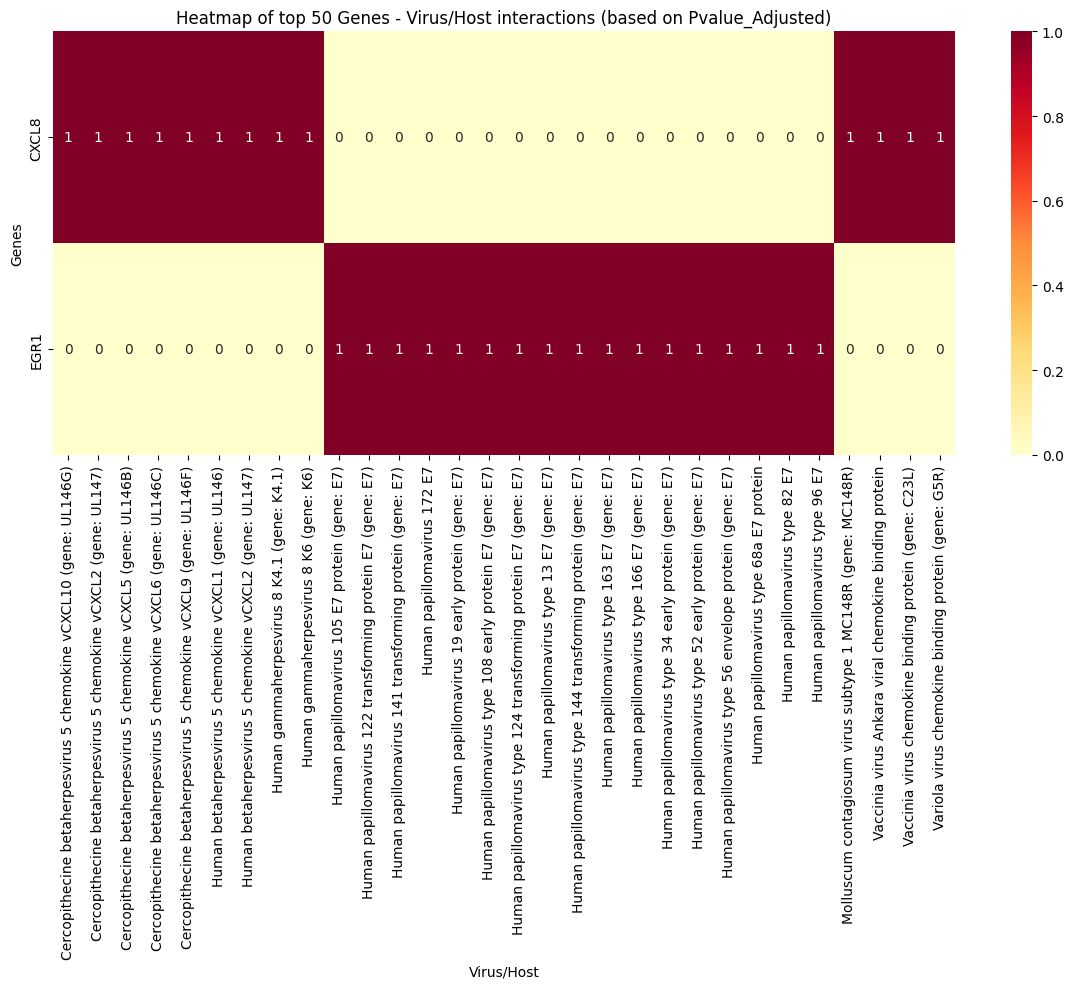

In [54]:
def process_column(column):
    if pd.isna(column):
        return []  # Manejo de valores NaN
    return [item.strip() for item in column.split(';')]

def filter_top_interactions(df, top_n=50):
    df_expanded = df.copy()
    df_expanded['Virus_Host_Term'] = df_expanded['Virus_Host_Term'].apply(process_column)
    df_expanded['Virus_Host_Pvalue_Adjusted'] = df_expanded['Virus_Host_Pvalue_Adjusted'].apply(lambda x: [float(p) if p.strip() else float('nan') for p in process_column(x)])
    
    df_expanded = df_expanded.explode('Genes')
    df_expanded = df_expanded.explode('Virus_Host_Term')
    df_expanded = df_expanded.explode('Virus_Host_Pvalue_Adjusted')
    
    df_expanded = df_expanded.dropna(subset=['Virus_Host_Pvalue_Adjusted'])  # Eliminar filas con Pvalue NaN
    df_expanded['Virus_Host_Pvalue_Adjusted'] = df_expanded['Virus_Host_Pvalue_Adjusted'].astype(float)  # Convertir a float
    
    df_filtered = df_expanded.sort_values(by='Virus_Host_Pvalue_Adjusted').groupby(['Genes', 'Virus_Host_Term']).first().reset_index()
    df_filtered = df_filtered.nsmallest(top_n, 'Virus_Host_Pvalue_Adjusted')
    
    return df_filtered

# Aplicar el filtro para obtener las mejores 50 interacciones
interaction_df = df[['Genes', 'Virus_Host_Term', 'Virus_Host_Pvalue_Adjusted']].copy()
filtered_df = filter_top_interactions(interaction_df, top_n=50)

# Verificar si filtered_df está vacío
if filtered_df.empty:
    print("El DataFrame filtrado está vacío. No se puede generar el heatmap.")
else:
    # Crear la matriz de interacciones entre Genes y Virus_Host_Term
    interaction_matrix = pd.crosstab(filtered_df['Genes'], filtered_df['Virus_Host_Term'])
    
    # Generar el heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Heatmap of top 50 Genes - Virus/Host interactions (based on Pvalue_Adjusted)')
    plt.xlabel('Virus/Host')
    plt.ylabel('Genes')
    plt.tight_layout()
    plt.savefig('top50_gene_virus_host_heatmap.png')
    print("Heatmap guardado como 'top50_gene_virus_host_heatmap.png'")

Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'


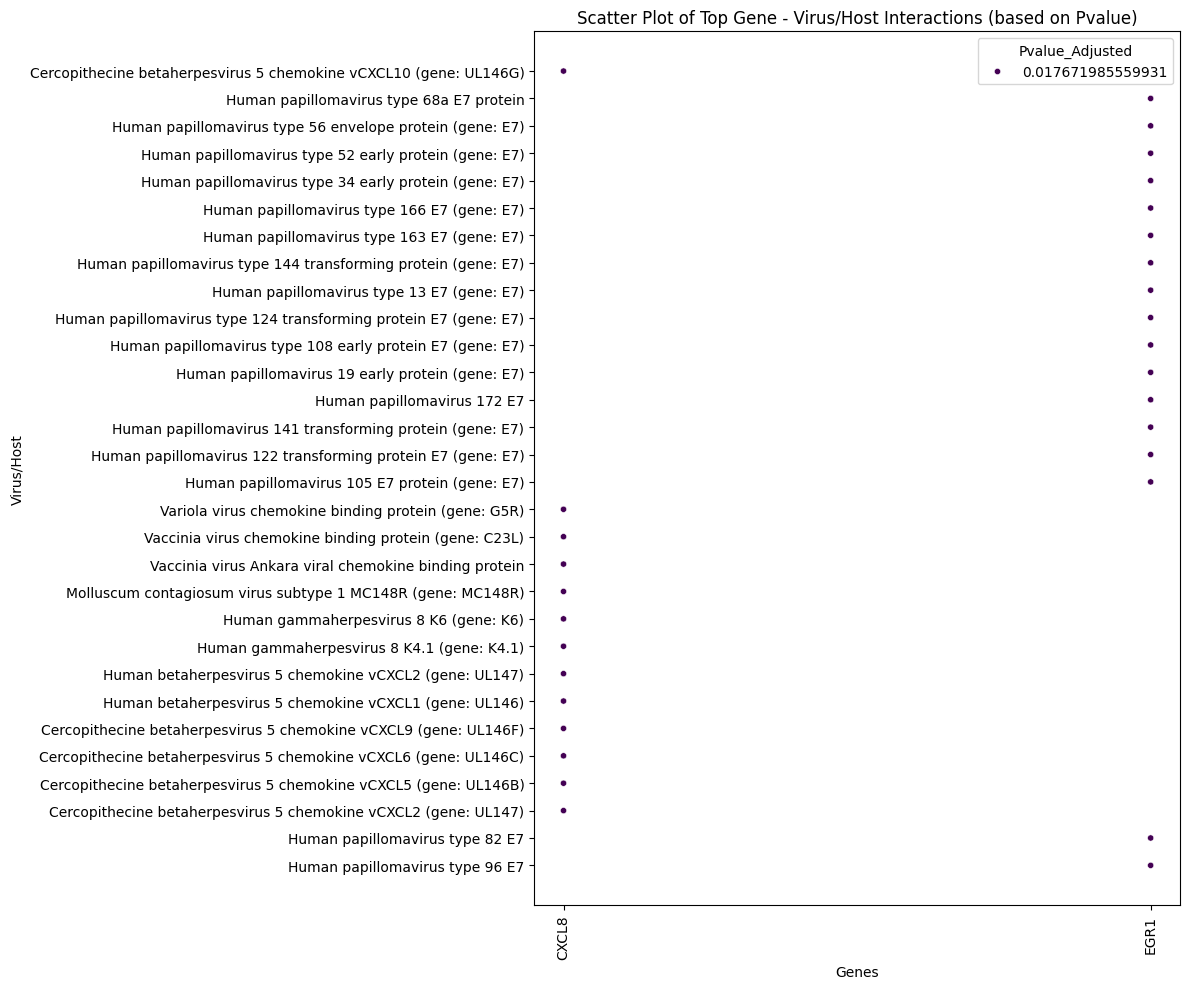

In [55]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=filtered_df, x='Genes', y='Virus_Host_Term', size='Virus_Host_Pvalue_Adjusted', hue='Virus_Host_Pvalue_Adjusted', palette='viridis', sizes=(20, 200))
plt.title('Scatter Plot of Top Gene - Virus/Host Interactions (based on Pvalue)')
plt.xlabel('Genes')
plt.ylabel('Virus/Host')
plt.legend(title='Pvalue_Adjusted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top50_gene_virus_host_scatterplot.png')
print("Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'")


C:\Users\3060\AppData\Local\Temp\ipykernel_12112\583626640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=interaction_counts, x='Virus_Host_Term', y='Count', palette='viridis')


Bar plot guardado como 'virus_host_interaction_counts.png'


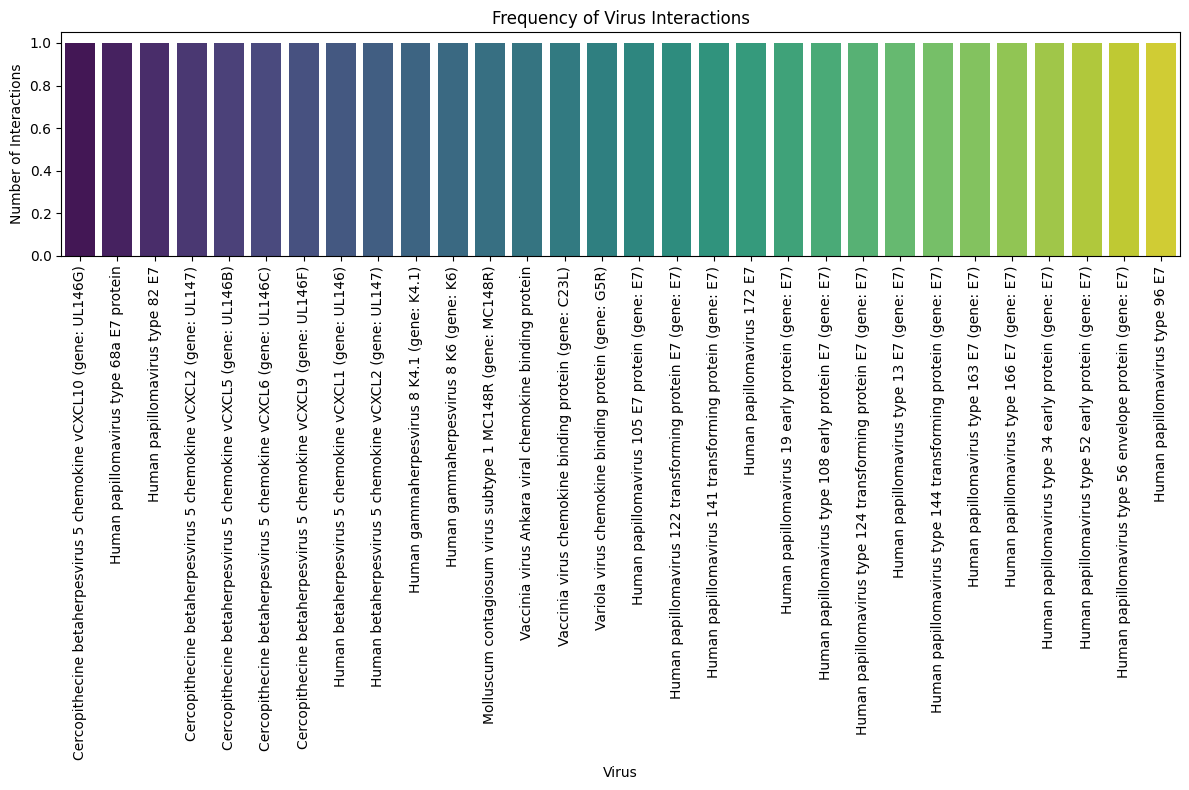

In [56]:

# Contar las interacciones por Virus_Host_Term
interaction_counts = filtered_df['Virus_Host_Term'].value_counts().reset_index()
interaction_counts.columns = ['Virus_Host_Term', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=interaction_counts, x='Virus_Host_Term', y='Count', palette='viridis')
plt.title('Frequency of Virus Interactions')
plt.xlabel('Virus')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('virus_host_interaction_counts.png')
print("Bar plot guardado como 'virus_host_interaction_counts.png'")


Obtener los archivos de nodos y aristas para crear la red en Cytoscape

In [9]:


# Cargar el archivo CSV
file_path = 'Integracion_con_patógenos_y_enfermedades_Bacillus_Subtilis_Padj_menor_0.5.csv'
data = pd.read_csv(file_path)

# Crear listas para nodos y aristas
nodos = set()
aristas = []

# Iterar sobre cada fila del DataFrame
for index, row in data.iterrows():
    gene = row['Genes']
    nodos.add((gene, 'Gene'))  # Agregar el gen como nodo

    # Procesar las columnas de enfermedades
    for term, pvalue_column in zip(['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term'],
                                   ['DisGeNET_Pvalue_Adjusted', 'GeDiPNet_Pvalue_Adjusted', 'Orphanet_Pvalue_Adjusted']):
        if pd.notna(row[term]):  # Verificar que no sea NaN
            enfermedades = row[term].split(';')  # Separar por punto y coma
            pvalues = str(row[pvalue_column]).split(';')  # Separar los valores P correspondientes
            for enfermedad, pvalue in zip(enfermedades, pvalues):
                if float(pvalue) < 0.05:  # Verificar que el valor P ajustado sea menor a 0.05
                    enfermedad_str = enfermedad.strip().replace(",", "")  # Eliminar comas
                    aristas.append((gene, enfermedad_str, float(pvalue)))  # Crear arista con pvalue
                    nodos.add((enfermedad_str, 'Disease'))  # Agregar enfermedad como nodo

    # Procesar las columnas de patógenos
    if pd.notna(row['Virus_Host_Term']):  # Verificar que no sea NaN
        patogenos = row['Virus_Host_Term'].split(';')  # Separar por punto y coma
        pvalues = str(row['Virus_Host_Pvalue_Adjusted']).split(';')  # Separar los valores P correspondientes
        for patogeno, pvalue in zip(patogenos, pvalues):
            if float(pvalue) < 0.05:  # Verificar que el valor P ajustado sea menor a 0.05
                patogeno_str = patogeno.strip().replace(",", "")  # Eliminar comas
                aristas.append((gene, patogeno_str, float(pvalue)))  # Crear arista con pvalue
                nodos.add((patogeno_str, 'Pathogen'))  # Agregar patógeno como nodo

# Crear DataFrame de nodos
nodos_df = pd.DataFrame(list(nodos), columns=['Id', 'Type'])

# Guardar el archivo de nodos
nodos_df.to_csv('nodos.csv', index=False)

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(aristas, columns=['Source', 'Target', 'Pvalue_Adjusted'])

# Eliminar duplicados en aristas
aristas_df = aristas_df.drop_duplicates()

# Guardar el archivo de aristas
aristas_df.to_csv('aristas.csv', index=False)
